<a href="https://colab.research.google.com/github/hongqin/quantum_sandbox/blob/main/202403_LiangCPSC3999_Ex00_HelloBasicSimulator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 00: Hello World on Basic Simulator

## Prepared by Dr. Yu Liang, CSE at UTC on March 18, 2024

## PART 1: Import the library

In [ ]:
!pip install qiskit --quiet
!pip install qiskit[visualization] --quiet

In [ ]:
import numpy as np

# Import Qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile
from qiskit.visualization import plot_histogram, plot_state_city
# from matplotlib import style
%matplotlib inline
import qiskit.quantum_info as qi


In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

## Part 2: Define the Quantum Circuit

### 2.1: Create the circuit

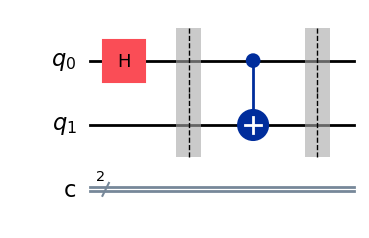

In [ ]:
# Create a new circuit with two qubits (first argument) and two classical
# bits (second argument)
qc = QuantumCircuit(2,2)

# Add a Hadamard gate to qubit 0
qc.h(0)
qc.barrier()

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)
qc.barrier()


# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

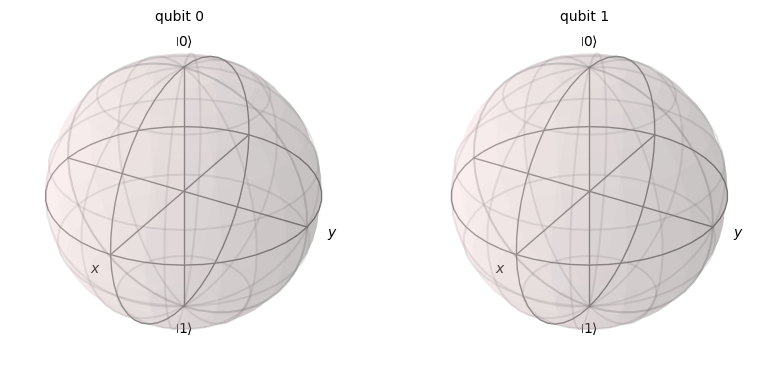

In [ ]:
state = Statevector(qc)
plot_bloch_multivector(state)

### 2.2: Measure and show the circuit

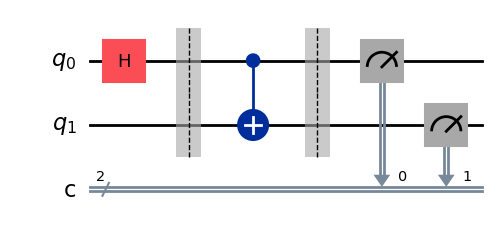

In [ ]:
# Measure the output register in the computational basis
qc.measure([0,1], [0,1])
qc.draw("mpl")

## Part 3: Transpile and run on basic simulator

## 3.1: Load the simulator

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator

In [ ]:
backend = BasicSimulator()

## 3.2: run the Hello World code

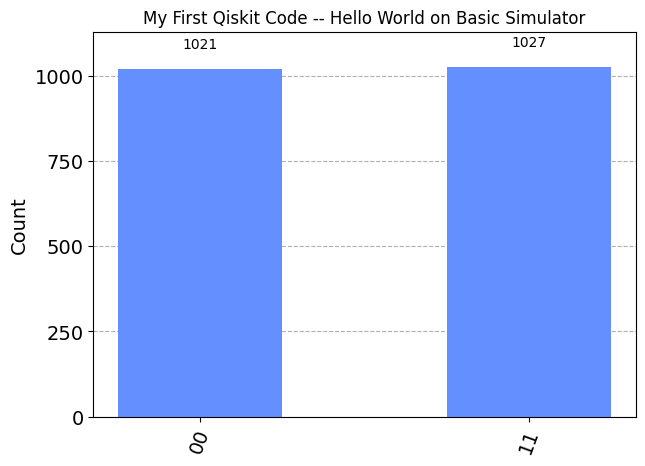

In [ ]:
# First version: not mapped
job = backend.run(transpile(qc, backend=backend, coupling_map=None), shots=2048)
result = job.result()
counts = result.get_counts(qc)
plot_histogram(counts, title='My First Qiskit Code -- Hello World on Basic Simulator')